# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

## Create the Model

In [6]:
#input layer
x = tf.placeholder(tf.float32,shape=[None,784])



In [7]:
# first hidden layer
W1 = tf.Variable(tf.truncated_normal([784,50],stddev=0.1))
b1 = tf.Variable(tf.zeros([50]))

In [8]:
#output of first hidden layer
y1 = tf.nn.relu(tf.matmul(x,W1) + b1)

In [9]:
# second hidden layer
W2 = tf.Variable(tf.truncated_normal([50,350],stddev=0.1))
b2 = tf.Variable(tf.zeros([350]))

In [10]:
#output of second hidden layer
y2 = tf.nn.relu(tf.matmul(y1,W2) + b2)

In [11]:
# third hidden layer
W3 = tf.Variable(tf.truncated_normal([350,650],stddev=0.1))
b3 = tf.Variable(tf.zeros([650]))

In [12]:
#output of third hidden layer
y3 = tf.nn.relu(tf.matmul(y2,W3) + b3)

In [13]:
# fourth hidden layer
W4 = tf.Variable(tf.truncated_normal([650,10],stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

In [14]:
#output of fourth hidden layer
y4 = tf.nn.softmax(tf.matmul(y3,W4) + b4)

softmax layer

Loss and Optimizer

In [15]:
y_true = tf.placeholder(tf.float32,[None,10])

In [16]:
# Cross Entropy

In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y4))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [19]:
train = optimizer.minimize(cross_entropy)

### Create Session

In [20]:
init = tf.global_variables_initializer()

In [21]:
sess=tf.Session()
sess.run(init)

In [46]:
#training
for step in range(100):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [47]:
#now test - first pass the last layer output I - through softmax activation
softmaxoutput=tf.nn.softmax(y4)
#now run this node in a session
predict=sess.run(softmaxoutput,feed_dict={x:mnist.test.images})

In [48]:
#argmax will give the predicted value in terms of a number
result=sess.run(tf.argmax(predict,1))

In [49]:
#same way get the label value using argmax
labhot=sess.run(tf.argmax(mnist.test.labels,1))

In [50]:
accuracy_score(result,labhot)

0.9413

In [51]:
#inference

In [52]:
#fetch one image from the test data set
test_image,test_label=mnist.test.next_batch(1) 

In [53]:
#run inference    
mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value:
[7]


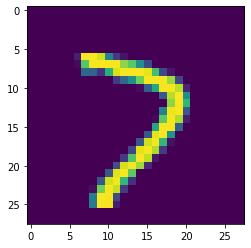

In [54]:
#display the image
plt.imshow(test_image.reshape(28,28))

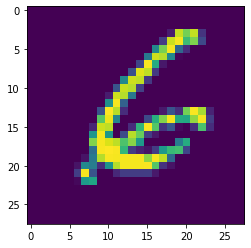

In [60]:
plt.imshow(mnist.validation.images[2516].reshape(28,28))

In [75]:

mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value:
[6]


In [74]:
test_image=mnist.validation.images[2156].reshape(1,784)   

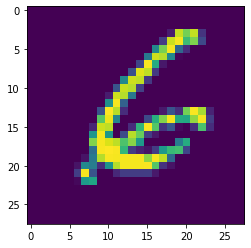

In [76]:
plt.imshow(mnist.validation.images[2516].reshape(28,28))

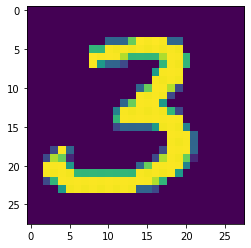

In [77]:
plt.imshow(mnist.validation.images[2816].reshape(28,28))

In [80]:
test_image=mnist.validation.images[2916].reshape(1,784)   

In [81]:
mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))


Predicted value:
[5]


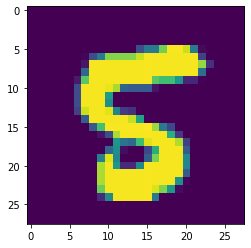

In [82]:
plt.imshow(mnist.validation.images[2916].reshape(28,28))